In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [2]:
data = pd.read_csv("loan_default.csv")

In [3]:
data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,2.680000e+11,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,01/03/12,May-12,95,1,...,0,0,0,1,0,0,0,0,0,1
1,6.730000e+11,Y,"Swanson, Newton and Miller",4.875,144000,360,01/01/12,Mar-12,72,1,...,0,0,0,0,0,0,0,1,0,1
2,7.430000e+11,Z,Thornton-Davis,3.250,366000,180,01/01/12,Mar-12,49,1,...,0,0,0,0,0,0,0,0,0,1
3,6.010000e+11,X,OTHER,4.750,135000,360,01/02/12,Apr-12,46,2,...,0,0,0,0,0,1,1,1,1,1
4,2.740000e+11,X,OTHER,4.750,124000,360,01/02/12,Apr-12,80,1,...,3,4,5,6,7,8,9,10,11,1


In [4]:
data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_id                   116058 non-null  float64
 1   source                    116058 non-null  object 
 2   financial_institution     116058 non-null  object 
 3   interest_rate             116058 non-null  float64
 4   unpaid_principal_bal      116058 non-null  int64  
 5   loan_term                 116058 non-null  int64  
 6   origination_date          116058 non-null  object 
 7   first_payment_date        116058 non-null  object 
 8   loan_to_value             116058 non-null  int64  
 9   number_of_borrowers       116058 non-null  int64  
 10  debt_to_income_ratio      116058 non-null  int64  
 11  borrower_credit_score     116058 non-null  int64  
 12  loan_purpose              116058 non-null  object 
 13  insurance_percent         116058 non-null  i

In [6]:
data.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494154e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597569e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000000e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.240000e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.490000e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.740000e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000e+12,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [7]:
import warnings; warnings.simplefilter('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix

In [8]:
data.source.value_counts()

X    63858
Y    37554
Z    14646
Name: source, dtype: int64

In [9]:
data.groupby('source')['loan_term'].mean()

source
X    281.947352
Y    306.771103
Z    300.182439
Name: loan_term, dtype: float64

In [10]:
# m13 is to be predicted
y = pd.DataFrame(data['m13'])
y

,m13
0,1
1,1
2,1
3,1
4,1
...,...
116053,0
116054,0
116055,0
116056,0


In [11]:
data.m13.value_counts(normalize = True)

0    0.99452
1    0.00548
Name: m13, dtype: float64

In [12]:
data[['origination_date','first_payment_date']]

,origination_date,first_payment_date
0,01/03/12,May-12
1,01/01/12,Mar-12
2,01/01/12,Mar-12
3,01/02/12,Apr-12
4,01/02/12,Apr-12
...,...,...
116053,01/02/12,Apr-12
116054,01/01/12,Mar-12
116055,01/02/12,Apr-12
116056,01/02/12,Apr-12


In [13]:
data1 = data.drop(['loan_id','origination_date','first_payment_date','m13','insurance_percent','insurance_type'],axis = 1)

In [14]:
data1['financial_institution'].value_counts()

OTHER                          49699
Browning-Hart                  31852
Swanson, Newton and Miller      6874
Edwards-Hoffman                 4857
Martinez, Duffy and Bird        4715
Miller, Mcclure and Allen       3158
Nicholson Group                 2116
Turner, Baldwin and Rhodes      1846
Suarez Inc                      1790
Cole, Brooks and Vincent        1642
Richards-Walters                1459
Taylor, Hunt and Rodriguez      1259
Sanchez-Robinson                1193
Sanchez, Hays and Wilkerson      853
Romero, Woods and Johnson        750
Thornton-Davis                   651
Anderson-Taylor                  483
Richardson Ltd                   473
Chapman-Mcmahon                  388
Name: financial_institution, dtype: int64

In [15]:
X1 = data[['financial_institution']]
X1

,financial_institution
0,"Turner, Baldwin and Rhodes"
1,"Swanson, Newton and Miller"
2,Thornton-Davis
3,OTHER
4,OTHER
...,...
116053,Browning-Hart
116054,OTHER
116055,OTHER
116056,OTHER


# Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
lm = LabelEncoder()
a = ['financial_institution']
for i in np.arange(len(a)):
    X1[a[i]] = lm.fit_transform(X1[a[i]])
X1    

,financial_institution
0,18
1,15
2,17
3,8
4,8
...,...
116053,1
116054,8
116055,8
116056,8


In [17]:
data1['financial_institution'] = X1
data1

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,Z,18,4.250,214000,360,95,1,22,694,C86,...,0,0,0,0,1,0,0,0,0,0
1,Y,15,4.875,144000,360,72,1,44,697,B12,...,0,0,0,0,0,0,0,0,1,0
2,Z,17,3.250,366000,180,49,1,33,780,B12,...,0,0,0,0,0,0,0,0,0,0
3,X,8,4.750,135000,360,46,2,44,633,B12,...,0,0,0,0,0,0,1,1,1,1
4,X,8,4.750,124000,360,80,1,43,681,C86,...,2,3,4,5,6,7,8,9,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116053,Y,1,4.125,153000,360,88,2,22,801,A23,...,0,0,0,0,0,0,0,0,0,0
116054,Z,8,3.000,150000,120,35,1,37,796,B12,...,0,0,0,0,0,0,0,0,0,0
116055,X,8,3.875,166000,360,58,2,49,724,B12,...,0,0,0,0,0,0,0,0,0,0
116056,X,8,4.250,169000,360,74,2,13,755,A23,...,0,0,0,0,0,0,0,0,0,0


In [18]:
sourc = pd.get_dummies(data1['source'])
LoanP = pd.get_dummies(data1['loan_purpose'])

In [19]:
data1 = pd.concat([data1,LoanP],axis=1)
data1 = data1.drop(['source','loan_purpose'],axis = 1)

In [20]:
data1.head()

,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,co-borrower_credit_score,m1,...,m6,m7,m8,m9,m10,m11,m12,A23,B12,C86
0,18,4.250,214000,360,95,1,22,694,0,0,...,0,1,0,0,0,0,0,0,0,1
1,15,4.875,144000,360,72,1,44,697,0,0,...,0,0,0,0,0,1,0,0,1,0
2,17,3.250,366000,180,49,1,33,780,0,0,...,0,0,0,0,0,0,0,0,1,0
3,8,4.750,135000,360,46,2,44,633,638,0,...,0,0,0,1,1,1,1,0,1,0
4,8,4.750,124000,360,80,1,43,681,0,0,...,5,6,7,8,9,10,11,0,0,1


# Training the Model

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data1, y, test_size=0.72, random_state = 2)

In [23]:
# Shape consistency check
print(x_train.shape)
print(y_train.shape)

(32496, 24)
(32496, 1)


In [24]:
print(x_test.shape)
print(y_test.shape)

(83562, 24)
(83562, 1)


# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logit = LogisticRegression()
logit.fit(x_train,y_train)
y_pred = logit.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9937890428663747


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [28]:
print('Accuracy score = ',accuracy_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

Accuracy score =  0.9937890428663747
f1 score =  0.0


# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_test)

In [30]:
print('Accuracy score = ',accuracy_score(y_test,y_pred))
print('Precision score =', precision_score(y_test,y_pred,))
print('Recall score =',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy score =  0.9924965893587995
Precision score = 0.3481781376518219
Recall score = 0.36058700209643607
f1 score =  0.3542739443872297


array([[82763,   322],
       [  305,   172]])

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rft = RandomForestClassifier(n_estimators = 900,
                             criterion = 'entropy',
                             max_depth = 2.3,
                             max_features = 'auto',
                             bootstrap = False,
                             verbose = 2,
                             warm_start = True,
                             random_state = 2,
                             n_jobs = -1
                            )
rft.fit(x_train,y_train)
y_pred = rft.predict(x_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    0.2s


building tree 1 of 900
building tree 2 of 900building tree 3 of 900building tree 4 of 900
building tree 5 of 900
building tree 6 of 900
building tree 7 of 900


building tree 8 of 900building tree 9 of 900
building tree 10 of 900

building tree 11 of 900building tree 12 of 900

building tree 13 of 900
building tree 14 of 900
building tree 15 of 900
building tree 16 of 900building tree 17 of 900

building tree 18 of 900
building tree 19 of 900
building tree 20 of 900
building tree 21 of 900
building tree 22 of 900building tree 23 of 900

building tree 24 of 900
building tree 25 of 900
building tree 26 of 900
building tree 27 of 900
building tree 28 of 900
building tree 29 of 900
building tree 30 of 900
building tree 31 of 900
building tree 32 of 900
building tree 33 of 900
building tree 34 of 900
building tree 35 of 900
building tree 36 of 900
building tree 37 of 900
building tree 38 of 900
building tree 39 of 900building tree 40 of 900

building tree 41 of 900
building tree 42 of 900bu

[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    0.5s


building tree 488 of 900building tree 489 of 900

building tree 490 of 900
building tree 491 of 900
building tree 492 of 900
building tree 493 of 900
building tree 494 of 900
building tree 495 of 900
building tree 496 of 900
building tree 497 of 900
building tree 498 of 900
building tree 499 of 900building tree 500 of 900building tree 501 of 900

building tree 502 of 900

building tree 503 of 900
building tree 504 of 900
building tree 505 of 900
building tree 506 of 900
building tree 507 of 900building tree 508 of 900
building tree 509 of 900

building tree 510 of 900
building tree 511 of 900
building tree 512 of 900building tree 513 of 900

building tree 514 of 900building tree 515 of 900
building tree 516 of 900

building tree 517 of 900
building tree 518 of 900
building tree 519 of 900
building tree 520 of 900
building tree 521 of 900building tree 522 of 900
building tree 523 of 900

building tree 524 of 900building tree 525 of 900
building tree 526 of 900
building tree 527 of 900



[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    0.8s


building tree 654 of 900
building tree 655 of 900
building tree 656 of 900
building tree 657 of 900
building tree 658 of 900
building tree 659 of 900
building tree 660 of 900
building tree 661 of 900
building tree 662 of 900
building tree 663 of 900
building tree 664 of 900
building tree 665 of 900
building tree 666 of 900
building tree 667 of 900
building tree 668 of 900
building tree 669 of 900
building tree 670 of 900
building tree 671 of 900
building tree 672 of 900
building tree 673 of 900
building tree 674 of 900
building tree 675 of 900
building tree 676 of 900
building tree 677 of 900
building tree 678 of 900building tree 679 of 900

building tree 680 of 900
building tree 681 of 900
building tree 682 of 900
building tree 683 of 900
building tree 684 of 900
building tree 685 of 900building tree 686 of 900building tree 687 of 900


building tree 688 of 900
building tree 689 of 900
building tree 690 of 900
building tree 691 of 900
building tree 692 of 900
building tree 693 of 900


[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    1.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 900 out of 900 | elapsed:    0.4s finished


In [32]:
print('Accuracy score = ',accuracy_score(y_test,y_pred))
print('Precision score =', precision_score(y_test,y_pred,))
print('Recall score =',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))
print('Confusion matrix')
confusion_matrix(y_test,y_pred)

Accuracy score =  0.995225102319236
Precision score = 0.9239130434782609
Recall score = 0.17819706498951782
f1 score =  0.2987697715289982
Confusion matrix


array([[83078,     7],
       [  392,    85]])

# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(1,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

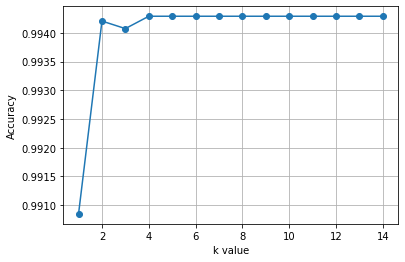

In [40]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [43]:
classifier = KNeighborsClassifier(n_neighbors = 14, metric = 'minkowski', p = 2)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [44]:
print('Accuracy score = ',accuracy_score(y_test,y_pred))
print('Precision score =', precision_score(y_test,y_pred))
print('Recall score =',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))
print('Confusion matrix')
confusion_matrix(y_test,y_pred)

Accuracy score =  0.9942916636748761
Precision score = 0.0
Recall score = 0.0
f1 score =  0.0
Confusion matrix


array([[83085,     0],
       [  477,     0]])

# Support Vector Machine

In [49]:
from sklearn.svm import SVC
classif = SVC(kernel = 'rbf', random_state = 3)
classif.fit(x_train,y_train)
y_pred = classif.predict(x_test)

In [50]:
print('Accuracy score = ',accuracy_score(y_test,y_pred))
print('Precision score =', precision_score(y_test,y_pred))
print('Recall score =',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))
print('Confusion matrix')
confusion_matrix(y_test,y_pred)

Accuracy score =  0.9942916636748761
Precision score = 0.0
Recall score = 0.0
f1 score =  0.0
Confusion matrix


array([[83085,     0],
       [  477,     0]])